# 연령별취업자수관계

- 국가통계포털 에서 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터 다운로드
- 전처리하기
  <hr>
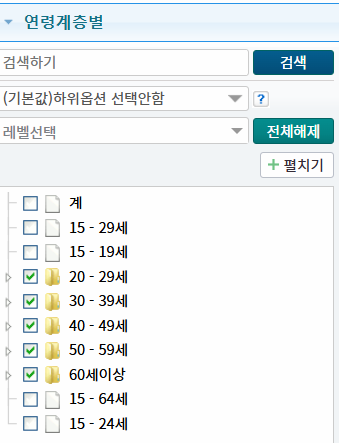
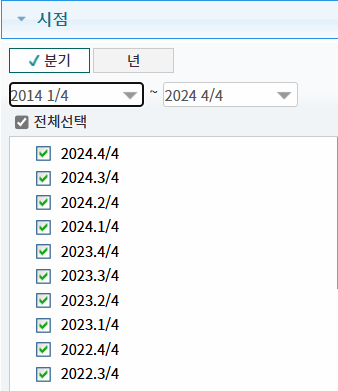
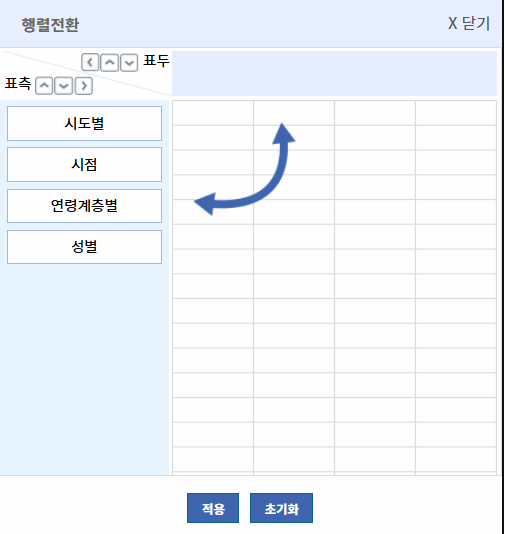

In [1]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

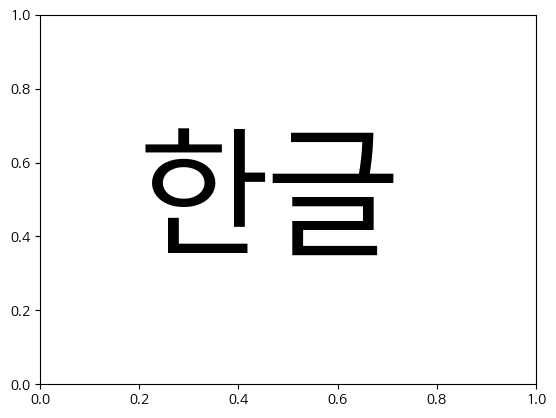

In [2]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [3]:
file_path ="./ref/행정구역시도성연령별취업자20250304.csv" 
ori= pd.read_csv(file_path, encoding="EUC-KR")
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [4]:
ex_data = ori.copy() # 복사
ex_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex_data.loc[ex_data['resion']=='세종특별자치시', 'value'] = ex_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시
ex_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [5]:
ex_data['value'] = ex_data['value'].astype(int)
ex1_data = ex_data.groupby('year')['value'].sum().reset_index(name="total")
ex1_data

,year,total
0,2014.1/4,24955
1,2014.2/4,25866
2,2014.3/4,25969
3,2014.4/4,25847
4,2015.1/4,25295
5,2015.2/4,26114
6,2015.3/4,26214
7,2015.4/4,26148
8,2016.1/4,25502
9,2016.2/4,26320


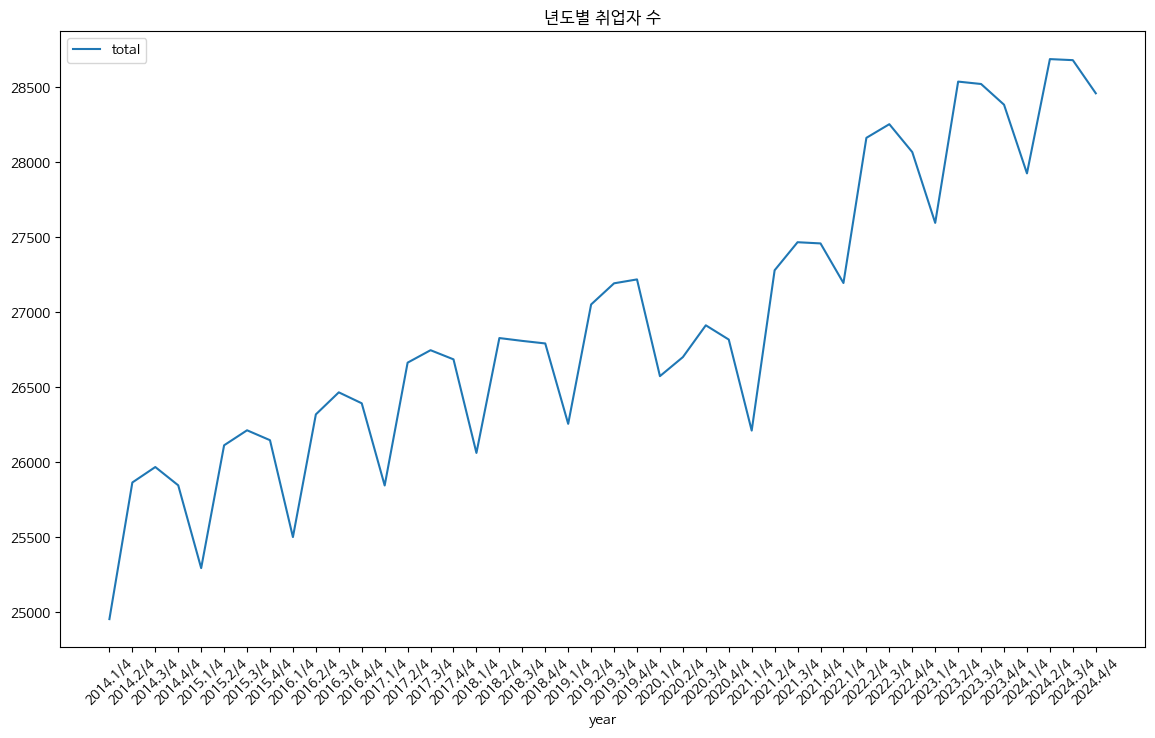

In [6]:
ax = ex1_data.plot(x='year', y='total', figsize=(14,8), title="년도별 취업자 수")
ax.set_xticks(range(len(ex1_data)))
ax.set_xticklabels(ex1_data['year'],rotation=45)
plt.show()

In [7]:
ex2_data = ori.copy() # 복사
ex2_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex2_data.loc[ex2_data['resion']=='세종특별자치시', 'value'] = ex2_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시
ex2_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [8]:
ex2_data['value'] = ex2_data['value'].astype(int)
gen = ex2_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')
gen

,year,gender,total
0,2014.1/4,남자,14650
1,2014.1/4,여자,10305
2,2014.2/4,남자,15027
3,2014.2/4,여자,10839
4,2014.3/4,남자,15088
...,...,...,...
83,2024.2/4,여자,12716
84,2024.3/4,남자,15945
85,2024.3/4,여자,12737
86,2024.4/4,남자,15868


In [9]:
filter_m = gen['gender']=='남자'
filter_f = gen['gender']=='여자'
male = gen[filter_m]
female = gen[filter_f]

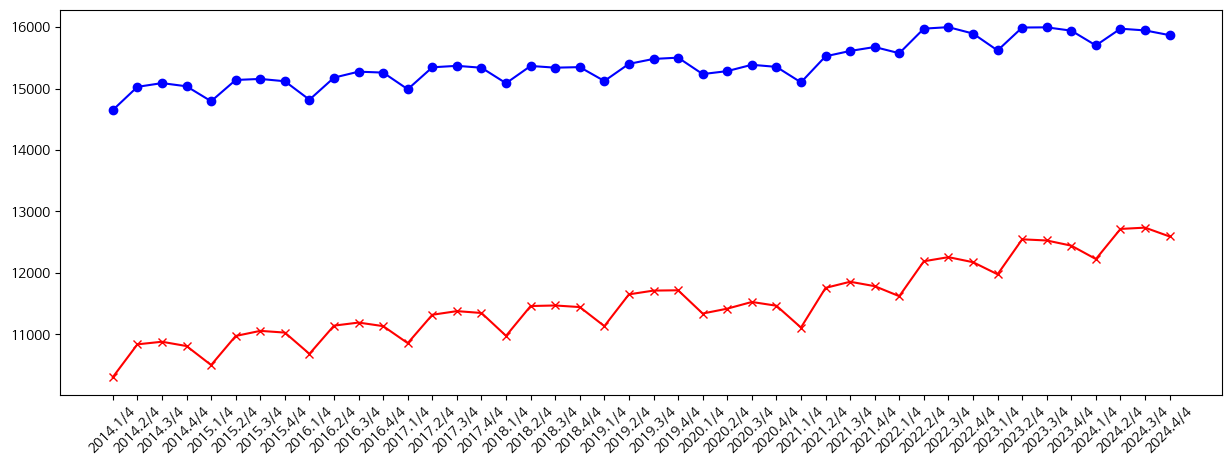

In [10]:
plt.figure(figsize=(15,5))
plt.plot(male['year'], male['total'], label='남자', color="blue", linestyle='-', marker='o')
plt.plot(female['year'], female['total'], label='여자', color="red", linestyle='-', marker='x')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'],rotation=45)
plt.show()

In [11]:
ex3_data = ori.copy()
ex3_data.loc[:, '데이터'] = ex3_data.loc[:, '데이터'].replace('-', 0)
ex3_data.loc[:, '데이터'] = ex3_data.loc[:, '데이터'].astype(int)

# 2024년
ex4_data = ori.copy()
ex4_data.loc[:, '데이터'] = ex4_data.loc[:, '데이터'].replace('-', 0)
ex4_data.loc[:, '데이터'] = ex4_data.loc[:, '데이터'].astype(int)

In [12]:
filter0 = (ex3_data['시점'] >= '2018.1/4') & (ex3_data['시점'] < '2019.1/4')
ex3_data = ex3_data[filter0]
ex3_data.head()

# 2024년
filter1 = (ex4_data['시점'] >= '2024.1/4') & (ex4_data['시점'] <= '2024.4/4')
ex4_data = ex4_data[filter1]
ex4_data.head()

,시도별,시점,연령계층별,성별,데이터
400,서울특별시,2024.1/4,20 - 29세,남자,366
401,서울특별시,2024.1/4,20 - 29세,여자,518
402,서울특별시,2024.1/4,30 - 39세,남자,635
403,서울특별시,2024.1/4,30 - 39세,여자,571
404,서울특별시,2024.1/4,40 - 49세,남자,617


In [30]:
x_data = ex3_data[ex3_data['연령계층별'].isin(['20 - 29세'])]
y_data = ex3_data[ex3_data['연령계층별'].isin(['60세이상'])]
# x_data.loc[:, '데이터'] = x_data.loc[:, '데이터'].astype(int)
# y_data.loc[:, '데이터'] = y_data.loc[:, '데이터'].astype(int)
z_data = ex3_data
# z_data.loc[:, '데이터'] = ex3_data_data.loc[:, '데이터'].astype(int)
x = x_data.groupby('시도별')['데이터'].sum()#.reset_index(name = 'total')
y = y_data.groupby('시도별')['데이터'].sum()#.reset_index(name = 'total')
z = z_data.groupby('시도별')['데이터'].sum()#.reset_index(name = 'total')
z
# x = x_data.groupby('시도별')['데이터'].sum(name = 'total')
# y = y_data.groupby('시도별')['데이터'].sum(name = 'total')

# 2024년
b_data = ex4_data[ex4_data['연령계층별'].isin(['20 - 29세'])]
c_data = ex4_data[ex4_data['연령계층별'].isin(['60세이상'])]

b = b_data.groupby('시도별')['데이터'].sum()
c = c_data.groupby('시도별')['데이터'].sum()

a_data = ex4_data
a = a_data.groupby('시도별')['데이터'].sum()
a

시도별
강원도         3351
경기도        30750
경상남도        6998
경상북도        5828
광주광역시       3083
대구광역시       4844
대전광역시       3136
부산광역시       6723
서울특별시      20814
세종특별자치시      834
울산광역시       2282
인천광역시       6751
전라남도        4004
전라북도        3940
제주도         1594
충청남도        5042
충청북도        3785
Name: 데이터, dtype: object

In [14]:
import numpy as np
regions = list((x.index))
color = [np.random.rand(3, ) for _ in range(len(regions))]

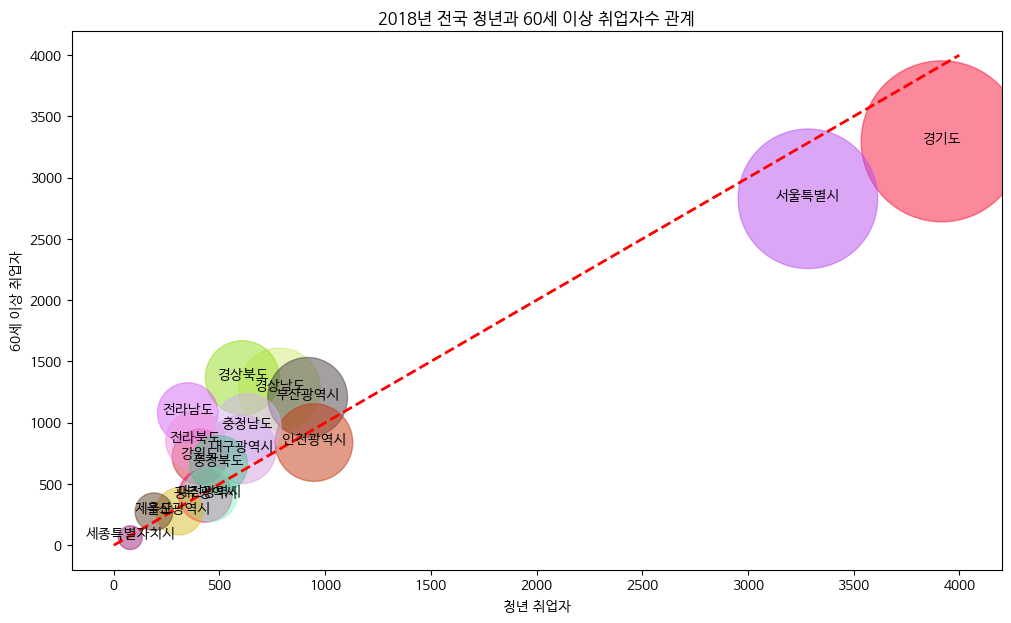

In [15]:
fig, ax = plt.subplots(figsize = (12, 7))
z = np.array(z, dtype = float)
scatter = ax.scatter(x, y, s = z * 0.5, c = color, alpha = 0.5)

for n in range(len(regions)):
    ax.annotate(regions[n], xy = ([x.iloc[n], y.iloc[n]]), ha = 'center')

ax.plot([0, 4000], [0, 4000], color = 'r', linestyle = '--', linewidth = 2)

ax.set_title('2018년 전국 청년과 60세 이상 취업자수 관계')
ax.set_xlabel('청년 취업자')
ax.set_ylabel('60세 이상 취업자')

plt.show()

In [31]:
regions1 = list((b.index))
color = [np.random.rand(3, ) for _ in range(len(regions1))]

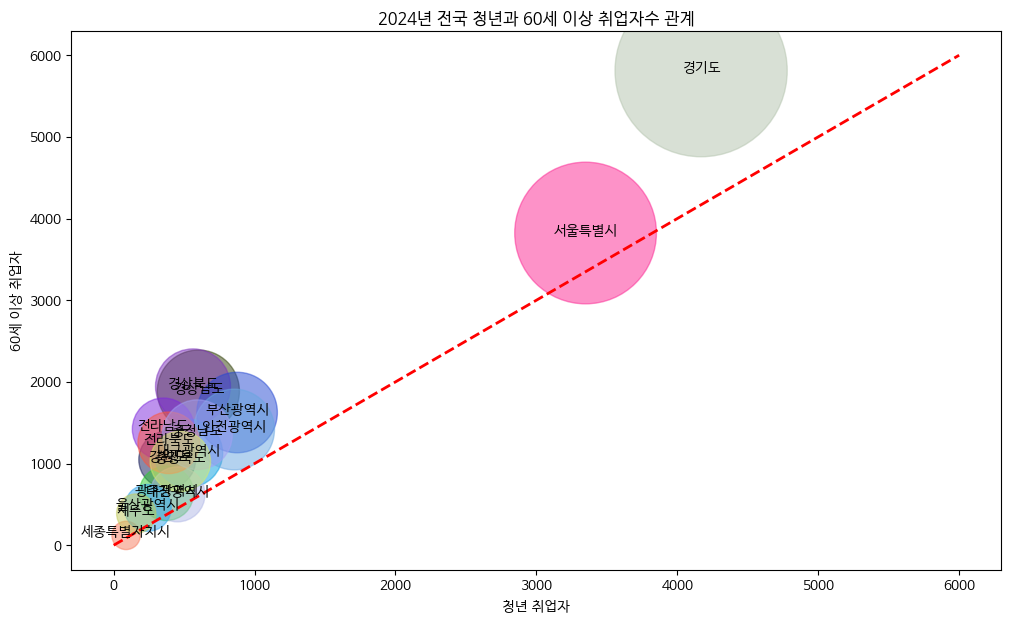

In [34]:
fig, axs = plt.subplots(figsize = (12, 7))
a = np.array(a, dtype = float)
scatter = axs.scatter(b, c, s = a * 0.5, c = color, alpha = 0.5)

for n in range(len(regions1)):
    axs.annotate(regions1[n], xy = ([b.iloc[n], c.iloc[n]]), ha = 'center')

axs.plot([0, 6000], [0, 6000], color = 'r', linestyle = '--', linewidth = 2)

axs.set_title('2024년 전국 청년과 60세 이상 취업자수 관계')
axs.set_xlabel('청년 취업자')
axs.set_ylabel('60세 이상 취업자')

plt.show()

In [59]:
xx_data = ori.copy()
xx_data = xx_data.groupby('시점')['데이터'].sum().reset_index(name = '데이터')
xx_data.loc[:, '데이터'] = xx_data.loc[:, '데이터'].astype(int)
xx = xx_data.groupby('시점')['데이터'].sum()

# ex3_data.loc[:, '데이터'] = ex3_data.loc[:, '데이터'].replace('-', 0)
# ex3_data.loc[:, '데이터'] = ex3_data.loc[:, '데이터'].astype(int)
# xx_data['시점'] = pd.to_datetime(xx_data['시점'], format = '%Y')
# xx_data = xx_data.rename(columns = {'시점' : 'ds', '데이터' : 'y'})
xx

OverflowError: int too big to convert

In [19]:
from prophet import Prophet

In [20]:
m = Prophet()
m.fit(ex1_data)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.